<a href="https://colab.research.google.com/github/SUYAMBULAKSHMI-VENKATESAN/DAMAKA/blob/main/Segmentation_region_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

+----------------+-----------------------+----------------------+--------------+--------+-----------+
| Technique      | Preprocessing Param   | Segmentation Param   | Method       |   Mean |   Std Dev |
+================+=======================+======================+==============+========+===========+
| Blurred Image  | (5, 5)                | -                    | -            |  98.23 |     29.66 |
+----------------+-----------------------+----------------------+--------------+--------+-----------+
| Region Growing | Seed=(240, 320)       | Tolerance=10         | Flood Fill   |   0    |      1.13 |
+----------------+-----------------------+----------------------+--------------+--------+-----------+
| Mean Shift     | sp=10, sr=30          | -                    | PyrMeanShift |  98.6  |     29.43 |
+----------------+-----------------------+----------------------+--------------+--------+-----------+


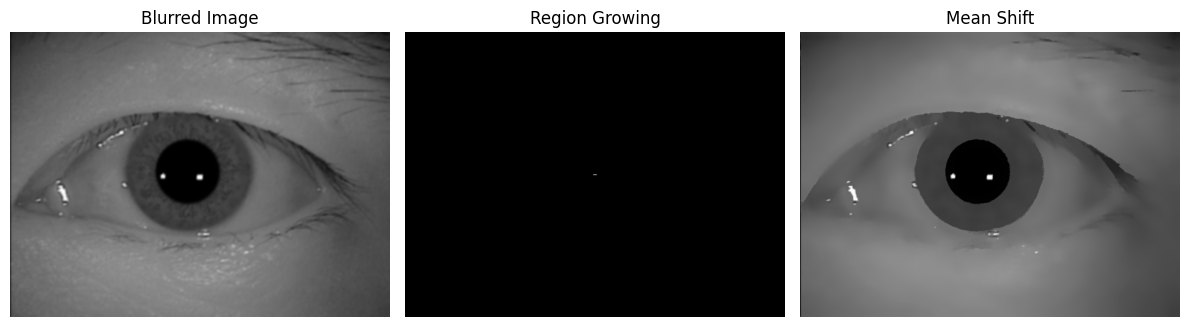

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from skimage.segmentation import flood_fill

def apply_region_based_segmentation(image_path):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Image not found at {image_path}")

    # Preprocessing - Gaussian Blur
    blur_kernel_size = (5, 5)
    blurred_image = cv2.GaussianBlur(image, blur_kernel_size, 0)

    # Define seed point (central pixel of the iris region)
    height, width = blurred_image.shape
    seed_point = (height // 2, width // 2)

    # Parameters for region growing
    tolerance = 10  # intensity tolerance from seed

    # Apply flood fill for region growing
    filled = flood_fill(blurred_image, seed_point, new_value=255, tolerance=tolerance)
    mask_region_growing = (filled == 255).astype(np.uint8) * 255

    # Mean Shift (approximated using pyrMeanShiftFiltering)
    mean_shift_image = cv2.pyrMeanShiftFiltering(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB), sp=10, sr=30)
    mean_shift_gray = cv2.cvtColor(mean_shift_image, cv2.COLOR_RGB2GRAY)

    # Metrics table
    table_data = [
        ["Blurred Image", str(blur_kernel_size), "-", "-", f"{np.mean(blurred_image):.2f}", f"{np.std(blurred_image):.2f}"],
        ["Region Growing", f"Seed={seed_point}", f"Tolerance={tolerance}", "Flood Fill", f"{np.mean(mask_region_growing):.2f}", f"{np.std(mask_region_growing):.2f}"],
        ["Mean Shift", "sp=10, sr=30", "-", "PyrMeanShift", f"{np.mean(mean_shift_gray):.2f}", f"{np.std(mean_shift_gray):.2f}"],
    ]

    headers = ["Technique", "Preprocessing Param", "Segmentation Param", "Method", "Mean", "Std Dev"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Display results
    titles = ["Blurred Image", "Region Growing", "Mean Shift"]
    images = [blurred_image, mask_region_growing, mean_shift_gray]

    plt.figure(figsize=(12, 6))
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    return table_data

# Example usage:
result = apply_region_based_segmentation("/content/S6000S00.jpg")
